## Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Dataset

In [10]:
df = pd.read_csv('players_21.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


## Data Preprocessing

In [11]:
#Take the necessary features out of all the features
df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential','international_reputation', 'weak_foot','skill_moves', 'attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_standing_tackle',
'defending_sliding_tackle', 'goalkeeping_diving',
'goalkeeping_handling', 'goalkeeping_kicking',
'goalkeeping_positioning', 'goalkeeping_reflexes']]
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,attacking_crossing,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,93,93,5,4,4,85,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,92,92,5,4,5,84,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,91,93,3,3,1,13,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,91,91,4,4,4,71,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,91,91,5,5,5,85,...,90,92,93,30,29,9,9,15,15,11


In [13]:
#Filter only the players with rating above 80
df = df[df.overall > 80]
df

,short_name,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,attacking_crossing,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,93,93,5,4,4,85,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,92,92,5,4,5,84,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,91,93,3,3,1,13,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,91,91,4,4,4,71,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,91,91,5,5,5,85,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,Rosberto Dourado,20,175,70,81,81,1,4,2,61,...,77,77,81,86,80,15,14,14,10,9
362,Louri Beretta,28,188,83,81,81,1,3,4,56,...,58,77,79,27,24,8,11,20,19,20
363,Welington Dano,20,178,69,81,81,1,4,4,82,...,75,61,82,77,81,16,15,15,7,7
364,Nuno Padrenda,24,180,75,81,81,1,4,2,67,...,75,55,78,52,42,8,9,12,8,8


In [15]:
#Fill the missing data
df = df.fillna(df.mean())

## Standardization

In [31]:
#Applying standardization to change the value into 0-1
from sklearn.preprocessing import MinMaxScaler
x = df.iloc[:,1:] #Numpy array
sc = MinMaxScaler()
X_norm = sc.fit_transform(x)
df_norm = pd.DataFrame(X_norm)
df_norm

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.608696,0.189189,0.317073,1.000000,0.857143,1.00,0.75,0.75,0.894118,1.000000,...,1.000000,0.795181,1.000000,0.301205,0.195122,0.045455,0.100000,0.142857,0.134831,0.057471
1,0.695652,0.648649,0.585366,0.916667,0.785714,1.00,0.75,1.00,0.882353,1.000000,...,0.821918,0.903614,0.982456,0.265060,0.195122,0.056818,0.100000,0.142857,0.134831,0.091954
2,0.347826,0.675676,0.682927,0.833333,0.857143,0.50,0.50,0.00,0.047059,0.034483,...,0.589041,0.024096,0.508772,0.024096,0.121951,0.965909,1.000000,0.835165,0.988764,1.000000
3,0.521739,0.567568,0.512195,0.833333,0.714286,0.75,0.75,0.75,0.729412,0.988506,...,0.780822,0.951807,0.859649,0.385542,0.134146,0.147727,0.044444,0.109890,0.067416,0.080460
4,0.391304,0.324324,0.219512,0.833333,0.714286,1.00,1.00,1.00,0.894118,0.908046,...,0.931507,1.000000,0.947368,0.240964,0.256098,0.079545,0.077778,0.142857,0.146067,0.091954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.043478,0.324324,0.268293,0.000000,0.000000,0.00,0.75,0.25,0.611765,0.517241,...,0.753425,0.819277,0.736842,0.915663,0.878049,0.147727,0.133333,0.131868,0.089888,0.068966
362,0.391304,0.675676,0.585366,0.000000,0.000000,0.00,0.50,0.75,0.552941,0.885057,...,0.493151,0.819277,0.701754,0.204819,0.195122,0.068182,0.100000,0.197802,0.191011,0.195402
363,0.043478,0.405405,0.243902,0.000000,0.000000,0.00,0.75,0.75,0.858824,0.494253,...,0.726027,0.626506,0.754386,0.807229,0.890244,0.159091,0.144444,0.142857,0.056180,0.045977
364,0.217391,0.459459,0.390244,0.000000,0.000000,0.00,0.75,0.25,0.682353,0.735632,...,0.726027,0.554217,0.684211,0.506024,0.414634,0.068182,0.077778,0.109890,0.067416,0.057471


In [32]:
#Applying the dimensionality reduction to reduce the dimensions to 3
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
df_new = pd.DataFrame(pca.fit_transform(df_norm))

## Modelling

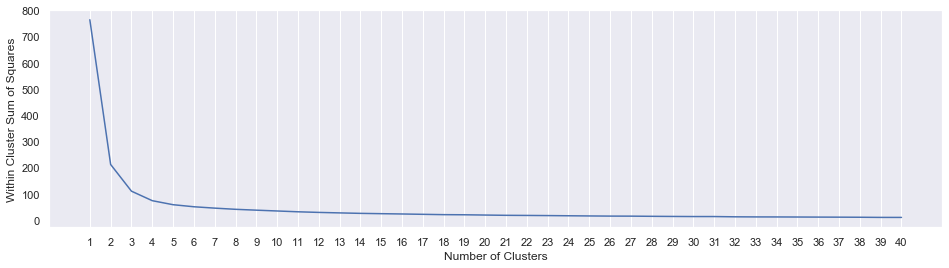

In [33]:
#Check how many clusters should we pick that have the least cost function value

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(df_new)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [34]:
#Using KMeans Algorithm for machine learning modelling
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4) #specify number of clusters
kmeans = kmeans.fit(df_new) #fit the dataset
labels = kmeans.predict(df_new) #predict which players belong to a certain cluster
cluster = kmeans.labels_.tolist() #obtain the cluster number for each players

In [35]:
#Displaying the output of predicted cluster
df_new.insert(loc = 0, column = 'Name', value = df['short_name'])
df_new.insert(loc = 1, column = 'Cluster',value = cluster)
df_new.columns = ['Name', 'Cluster', 'Feature 1', 'Feature 2', 'Feature 3']
df_new

,Name,Cluster,Feature 1,Feature 2,Feature 3
0,L. Messi,0,-1.130671,-1.075301,0.804517
1,Cristiano Ronaldo,0,-0.999133,-0.853829,1.250804
2,J. Oblak,1,2.812787,-0.279840,0.510557
3,R. Lewandowski,0,-0.894518,-0.591595,1.047879
4,Neymar Jr,0,-1.082251,-1.154544,0.532770
...,...,...,...,...,...
361,Rosberto Dourado,2,-0.362858,0.501268,-0.678267
362,Louri Beretta,0,-0.123353,-0.423908,0.308553
363,Welington Dano,2,-0.505124,0.365599,-0.713382
364,Nuno Padrenda,2,-0.409309,-0.128734,-0.277498
